# 📊 Retail Business Intelligence Dashboard (Python)
**Author:** Betelhem Hailu  

**Objective**  
Transform 1000000+ cleaned retail transactions into business insights that help:
- Increase revenue
- Optimize promotions
- Improve customer targeting
- Support executive decision-making

**Tools Used**
- Python (Pandas, Matplotlib, Seaborn, Plotly)
- Jupyter Notebook


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import ast

sns.set_theme(style="whitegrid")

df = pd.read_csv("../data/processed/cleaned_retail.csv", parse_dates=["Date"])



Setup

In [5]:
from pathlib import Path
VISUALS_PATH = Path("../visuals")
VISUALS_PATH.mkdir(parents=True, exist_ok=True)

In [6]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Product_Count
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,No Promotion,3
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),5
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,No Promotion,1
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,No Promotion,2
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,1


KPI SUMMARY

In [7]:
total_revenue = df['Total_Cost'].sum()
total_transactions = df.shape[0]
avg_basket = df['Total_Cost'].mean()

pd.DataFrame({
    "Metric": ["Total Revenue", "Total Transactions", "Avg Transaction Value"],
    "Value": [f"${total_revenue:,.0f}", total_transactions, f"${avg_basket:,.2f}"]
})


,Metric,Value
0,Total Revenue,"$52,455,220"
1,Total Transactions,1000000
2,Avg Transaction Value,$52.46


Q1. How is revenue trending over time?


In [8]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

monthly_revenue = (
    df.groupby('YearMonth')['Total_Cost']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_revenue,
    x="YearMonth",
    y="Total_Cost",
    title="Monthly Revenue Trend",
    markers=True
)
fig.show()
plt.savefig(VISUALS_PATH / "overall_trend.png", dpi=300, bbox_inches="tight")



<Figure size 640x480 with 0 Axes>

🔹 Q2. Which cities generate the most revenue?



In [9]:
city_revenue = (
    df.groupby("City")["Total_Cost"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig = px.bar(
    city_revenue,
    x="Total_Cost",
    y="City",
    orientation="h",
    title="Top 10 Cities by Revenue",
    color="Total_Cost",
    color_continuous_scale="Blues"
)
fig.show()


🔹 Q3. Which store types perform best?

In [21]:
store_revenue = (
    df.groupby("Store_Type")["Total_Cost"]
    .sum()
    .reset_index()
)

fig = px.pie(
    store_revenue,
    names="Store_Type",
    values="Total_Cost",
    title="Revenue Share by Store Type",
    hole=0.4
)
fig.show()


🔹 Q4. Do promotions actually increase revenue?

In [11]:
promo_revenue = (
    df.groupby("Promotion")["Total_Cost"]
    .sum()
    .reset_index()
    .sort_values("Total_Cost", ascending=False)
)

fig = px.bar(
    promo_revenue,
    x="Total_Cost",
    y="Promotion",
    orientation="h",
    title="Revenue Impact of Promotions",
    color="Total_Cost"
)
fig.show()


Q5. Who are the most valuable customer segments?


In [12]:
customer_revenue = (
    df.groupby("Customer_Category")["Total_Cost"]
    .sum()
    .reset_index()
)

fig = px.bar(
    customer_revenue,
    x="Customer_Category",
    y="Total_Cost",
    title="Revenue by Customer Segment",
    color="Customer_Category"
)
fig.show()


🔹 Q6. What is the typical basket size?

In [13]:
fig = px.histogram(
    df,
    x="Product_Count",
    nbins=15,
    title="Basket Size Distribution",
    marginal="box"
)
fig.show()


🔹 Q7. Discount vs No Discount Performance 

In [14]:
discount_analysis = (
    df.groupby("Discount_Applied")["Total_Cost"]
    .agg(["sum", "mean", "count"])
    .reset_index()
)

discount_analysis


,Discount_Applied,sum,mean,count
0,False,26206304.14,52.423512,499896
1,True,26248916.26,52.486915,500104


In [15]:
fig = px.bar(
    discount_analysis,
    x="Discount_Applied",
    y="sum",
    title="Revenue: Discount vs No Discount",
    labels={"sum": "Total Revenue"}
)
fig.show()


Q8. Top preforming product over seasons

In [18]:


# Convert Product string to list
df['Product_List'] = df['Product'].apply(ast.literal_eval)

# Explode products
exploded = df.explode('Product_List')

# Count products per season
season_product = (
    exploded
    .groupby(['Season', 'Product_List'])
    .size()
    .reset_index(name='count')
)

# Top 5 per season
top_season_products = (
    season_product
    .sort_values(['Season', 'count'], ascending=[True, False])
    .groupby('Season')
    .head(5)
)


C:\Users\Envy\AppData\Local\Temp\ipykernel_1224\4027731403.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Envy\AppData\Local\Temp\ipykernel_1224\4027731403.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Envy\AppData\Local\Temp\ipykernel_1224\4027731403.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Envy\AppData\Local\Temp\ipykernel_1224\4027731403.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Envy\AppData\Local\Temp\ipykernel_1224\4027731403.py:7: FutureWarning:



Passing `palette` without

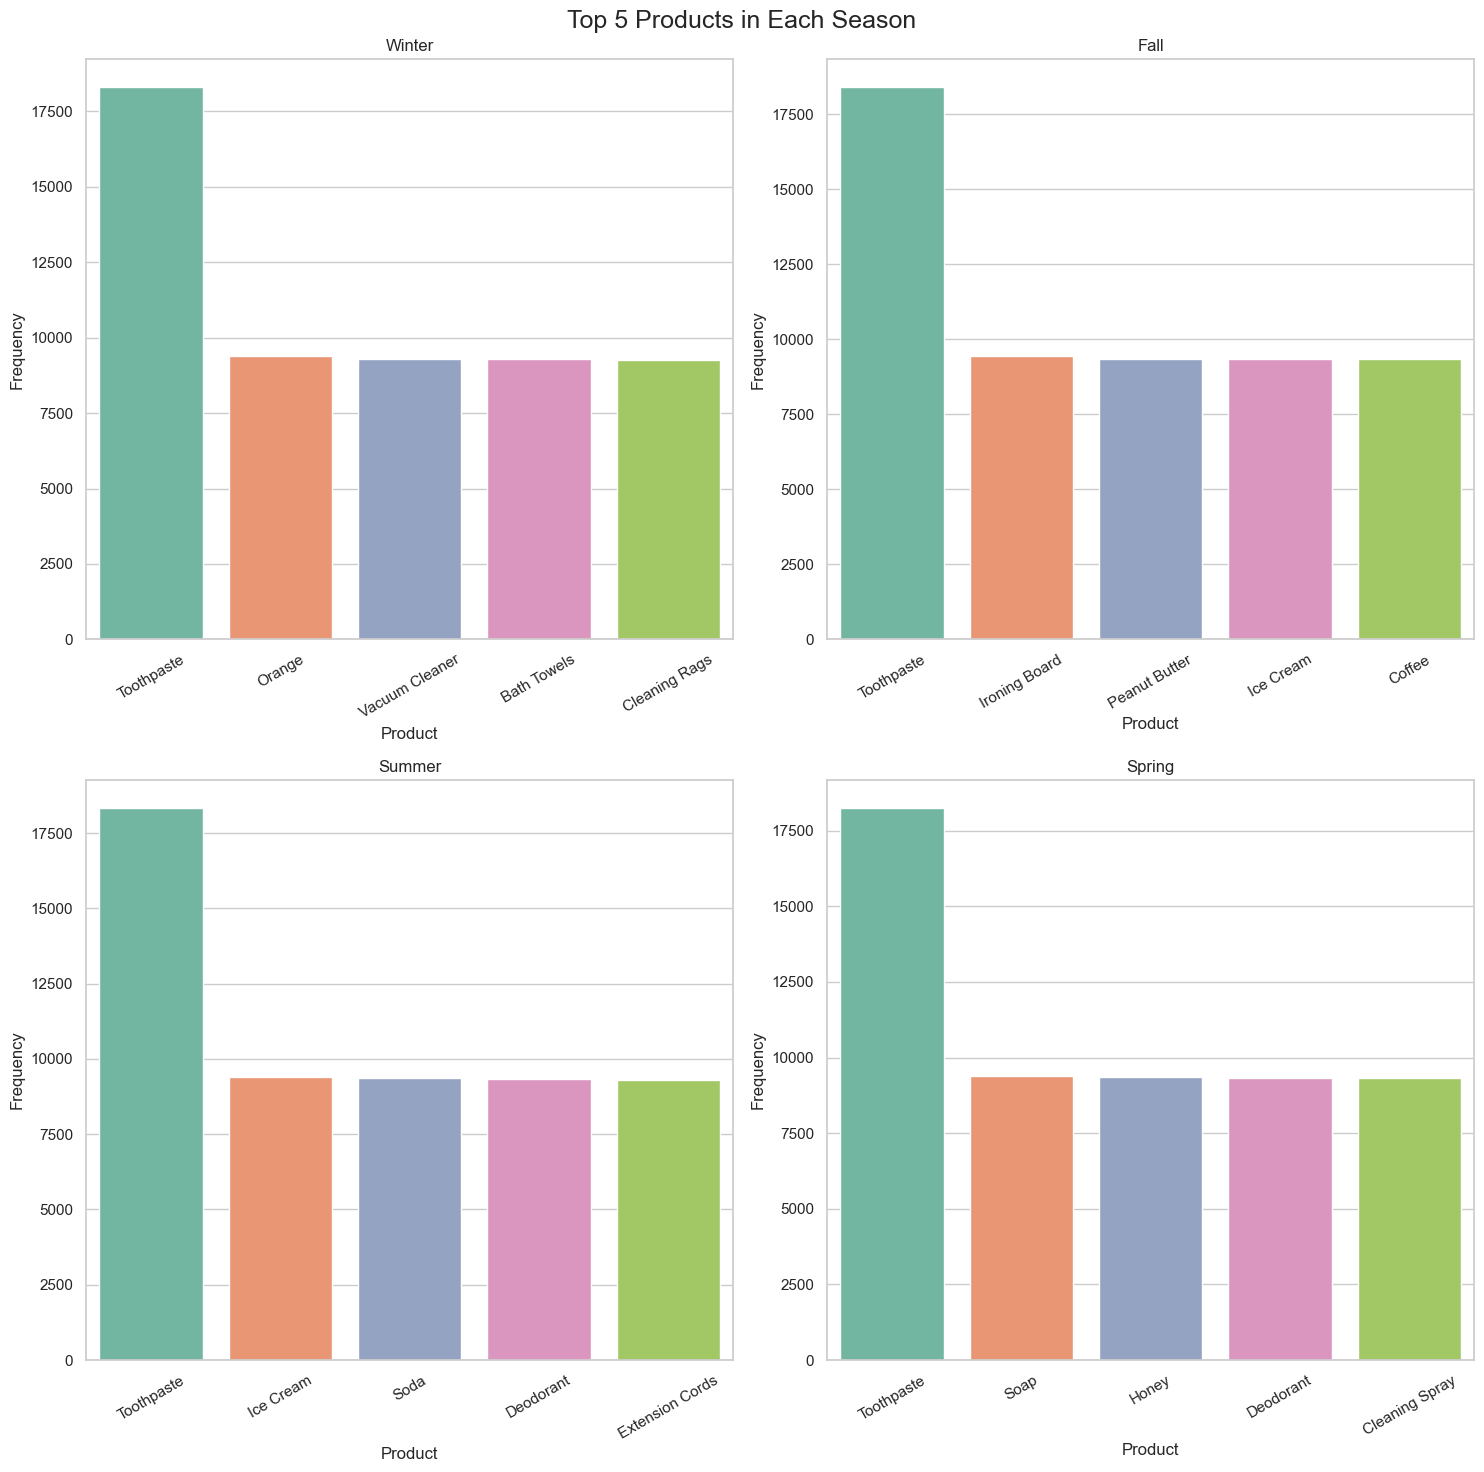

In [20]:

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
seasons = ['Winter', 'Fall', 'Summer', 'Spring']

for ax, season in zip(axes.flatten(), seasons):
    data = top_season_products[top_season_products['Season'] == season]
    
    sns.barplot(
        data=data,
        x='Product_List',
        y='count',
        ax=ax,
        palette='Set2'
    )
    
    ax.set_title(season)
    ax.set_xlabel("Product")
    ax.set_ylabel("Frequency")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.suptitle("Top 5 Products in Each Season", fontsize=18)
plt.tight_layout()
plt.savefig("../visuals/top_products_by_season.png", dpi=300)
plt.show()


Q9 . Monthly trend

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

yearly_monthly_sales = (
    df.groupby(['Year', 'Month'])['Total_Cost']
    .sum()
    .reset_index()
)


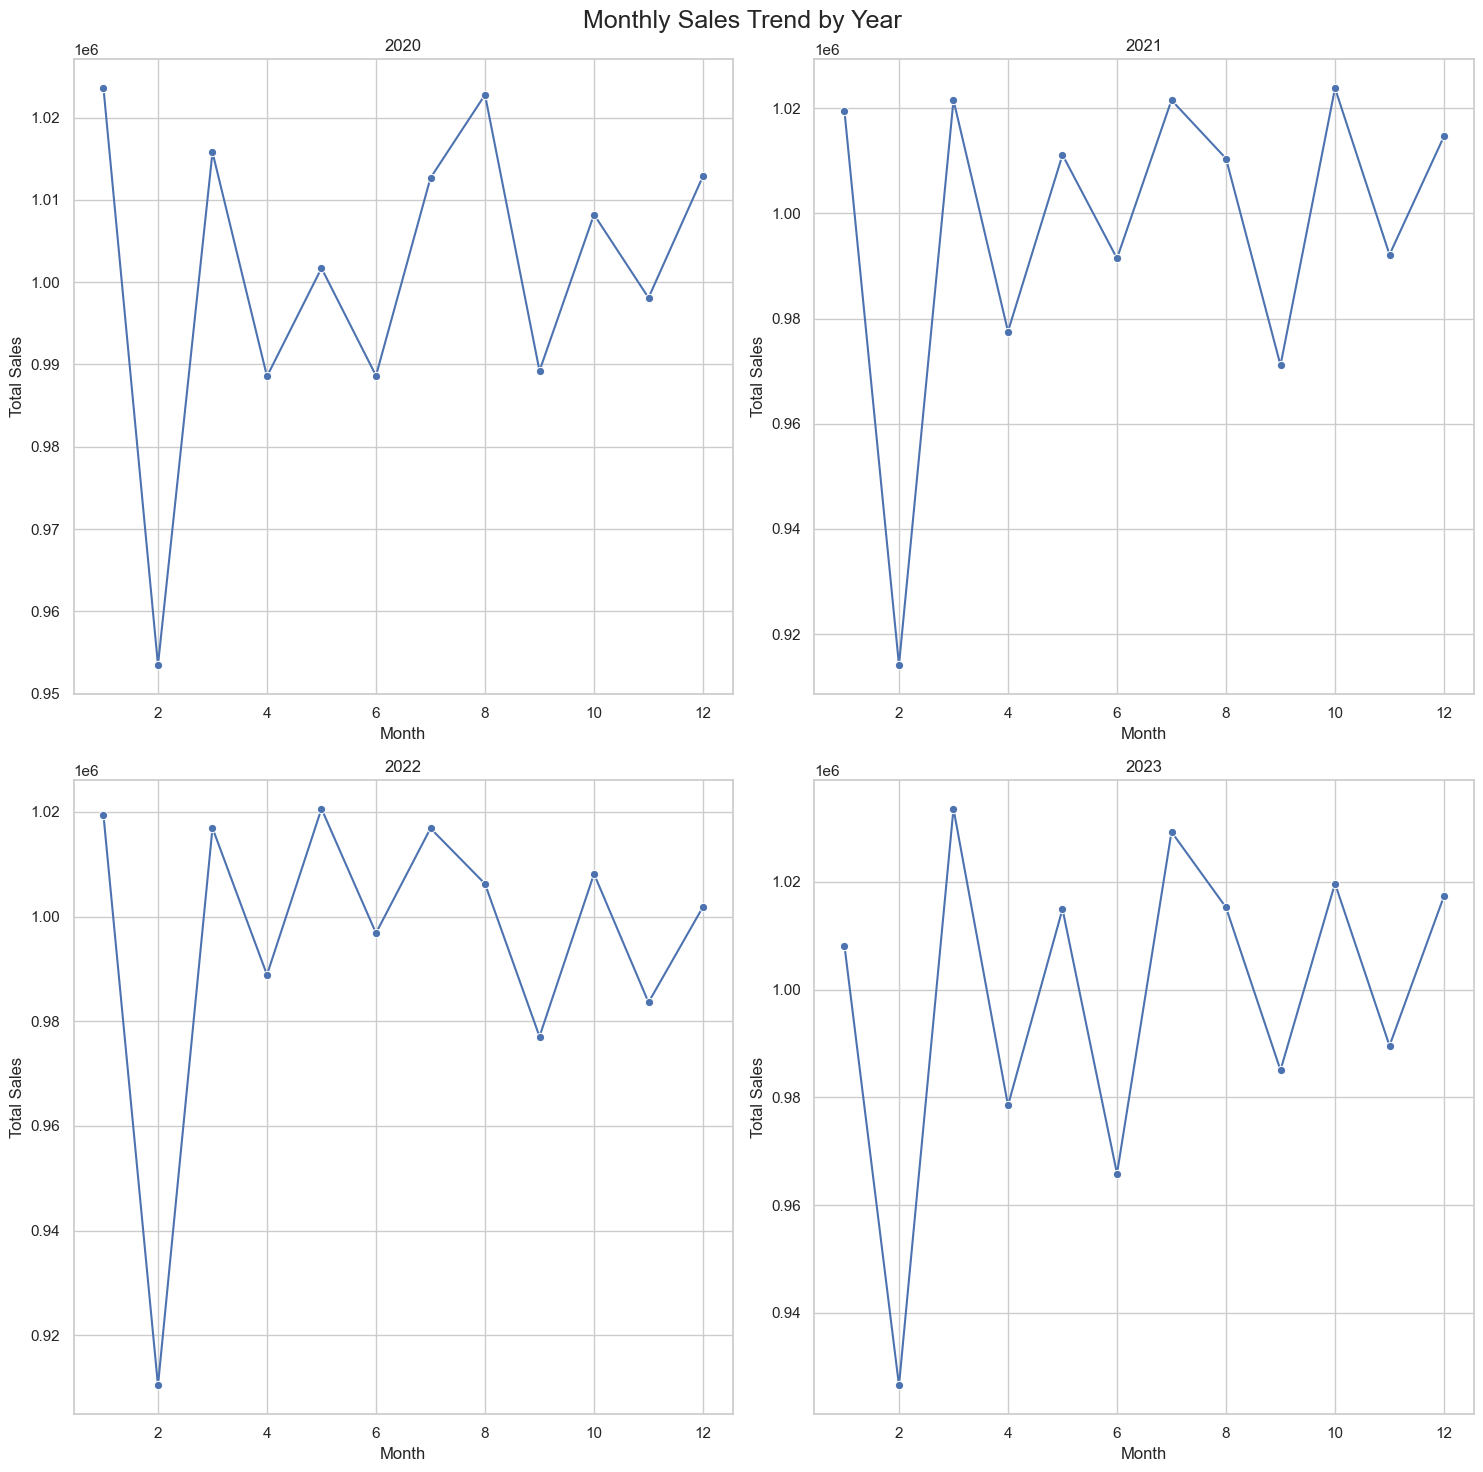

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
years = sorted(yearly_monthly_sales['Year'].unique())

for ax, year in zip(axes.flatten(), years):
    data = yearly_monthly_sales[yearly_monthly_sales['Year'] == year]
    
    sns.lineplot(
        data=data,
        x='Month',
        y='Total_Cost',
        ax=ax,
        marker='o'
    )
    
    ax.set_title(str(year))
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Sales")

plt.suptitle("Monthly Sales Trend by Year", fontsize=18)
plt.tight_layout()
plt.savefig("../visuals/monthly_sales_by_year.png", dpi=300)
plt.show()


Q 10. Which payment methods generate the most revenue?

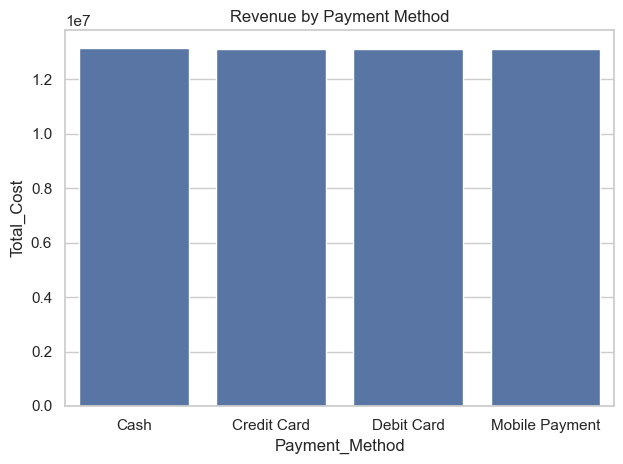

In [ ]:
payment_sales = df.groupby('Payment_Method')['Total_Cost'].sum().reset_index()

sns.barplot(data=payment_sales, x='Payment_Method', y='Total_Cost')
plt.title("Revenue by Payment Method")
plt.tight_layout()
plt.savefig(VISUALS_PATH / "payment_method_revenue.png", dpi=300)
plt.show()


Q 11. Which store type + city combination performs best?

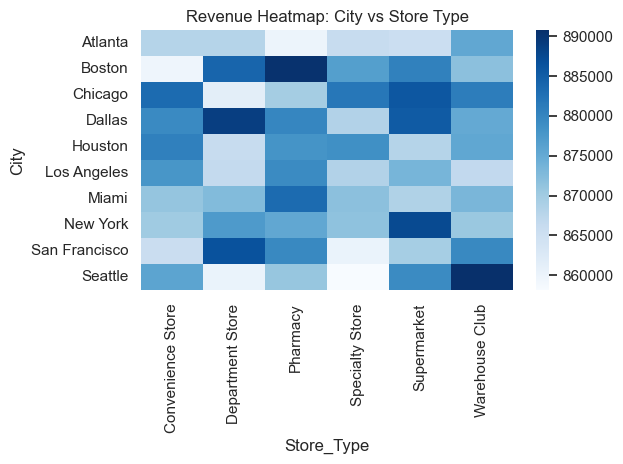

In [ ]:
pivot = pd.pivot_table(
    df,
    values='Total_Cost',
    index='City',
    columns='Store_Type',
    aggfunc='sum'
)

sns.heatmap(pivot, cmap="Blues")
plt.title("Revenue Heatmap: City vs Store Type")
plt.tight_layout()
plt.savefig(VISUALS_PATH / "city_store_heatmap.png", dpi=300)
plt.show()
